# Naive Bayes

## Introduction

We will start by working on the Iris dataset. Recall that Iris dataset contains iris species and sepal and petal measurements. We will quickly explore the dataset and jump into Naive Bayes.

## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

*Daniel*: Separate the imports statements

In [3]:
import pandas as pd
import numpy as np

In [4]:
filepath = '../../data/Iris_Data.csv'
data = pd.read_csv(filepath)

*Daniel*: printing

In [5]:
print("Iris Dataset: Attributes")
for attr in data.columns:
    print(f"\t* {attr}")

print("Iris Dataset: Shape")
print(f"\t* {data.shape}")

Iris Dataset: Attributes
	* sepal_length
	* sepal_width
	* petal_length
	* petal_width
	* species
Iris Dataset: Shape
	* (150, 5)


In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
print("Iris Dataset: Attributes datatypes")
for attr, dtype in data.dtypes.items():
    print(f"\t* {attr}: {dtype}")

Iris Dataset: Attributes datatypes
	* sepal_length: float64
	* sepal_width: float64
	* petal_length: float64
	* petal_width: float64
	* species: object


Notice that aside from the predictor variable, everything is float.

In [8]:
skew = pd.DataFrame(data.select_dtypes(include=[np.number]).skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
sepal_length,0.314911,False
sepal_width,0.334053,False
petal_length,-0.274464,False
petal_width,-0.104997,False


Fields are not too badly skewed.

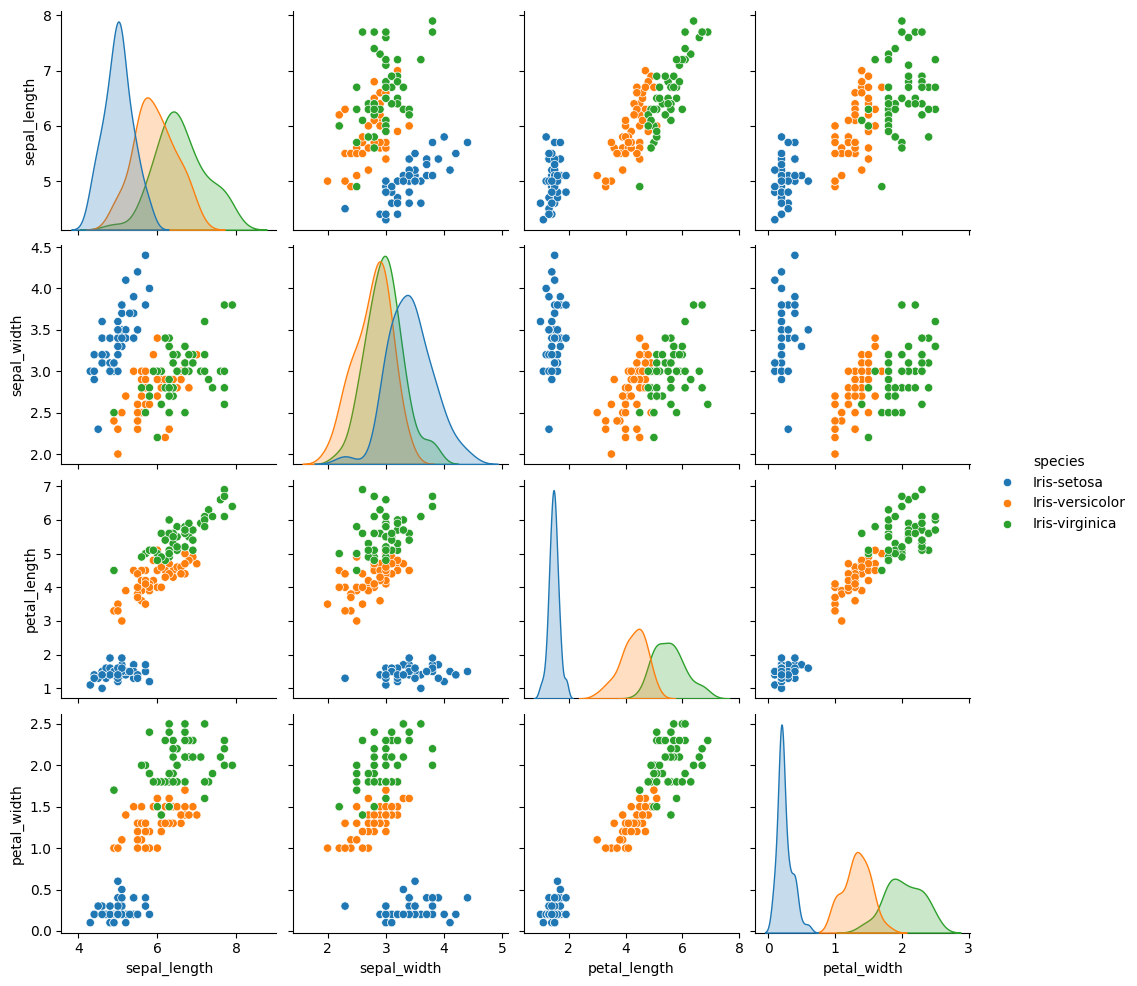

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue='species')

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [10]:
# Since the features are continuous, the right choice is GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [11]:
X = data[data.columns[:-1]]
y = data.species

In [12]:
GNB = GaussianNB()
cv_N = 4
scores = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)

In [13]:
for score in scores:
    print(f"\t* {score}")

	* 0.9473684210526315
	* 0.9473684210526315
	* 0.918918918918919
	* 1.0


In [14]:
np.mean(scores)

np.float64(0.9534139402560455)

## Question 3:

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [15]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [16]:
X = data[data.columns[:-1]]
y = data.species

In [17]:
nb = {
      'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()
}

In [18]:
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)

In [19]:
for name, score in scores.items():
    print(f"\t* {name}: {score}")

	* gaussian: 0.9534139402560455
	* bernoulli: 0.3200568990042674
	* multinomial: 0.966394025604552


Looks like BernoulliNB results are very bad, but MultinomialNB is doing a very good job.

Why are the results of Bernoulli bad? Find out the reason.

*Daniel*: The reason that the bernoulli model performed so bad $0.32$ is that it assumes binary features, which is not the case for this dataset.

## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the *petal_* features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

In [20]:
X = data[['sepal_length', 'sepal_width']]
y = data.species

In [21]:
nb = {
    'gaussian': GaussianNB(),
    'bernoulli': BernoulliNB(),
    'multinomial': MultinomialNB()
}

# Try other variants on the lines shown in the previous cell for GaussianNB and compare the results on scoring = 'accuracy'.
# Run the piece of code as shown in array in question 3

In [22]:
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)

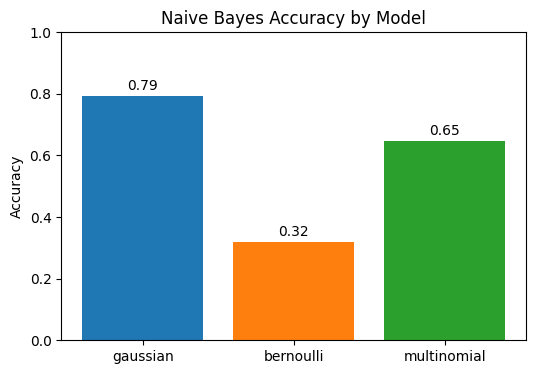

In [23]:
#plot the accuracies for each model

import matplotlib.pyplot as plt

labels = list(scores.keys())
values = list(scores.values())

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(labels, values, color=['C0','C1','C2'])
ax.set_ylim(0, 1)
ax.set_ylabel('Accuracy')
ax.set_title('Naive Bayes Accuracy by Model')
for i, v in enumerate(values):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

#Come up with your observations after taking away the very predictive features, which model works better

*Daniel*: as we can see all the scores are lower than before, since we removed the feature that are closely related together (the plot gives a clear correlation) so we remove the correlated features and so the multiplication is smaller since the features are now more independent.

## Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

In [24]:
X = data[data.columns[:-1]]
y = data.species


In [25]:
n_copies = [0, 1, 3, 5, 10, 50, 100]

In [26]:
def create_copies_sepal_length(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['sepal_length_copy%s' % i] = X['sepal_length']
    return X_new


def get_cross_val_score(n):
    X_new = create_copies_sepal_length(X, n)
    scores = cross_val_score(GaussianNB(), X_new, y, cv=cv_N, n_jobs=cv_N)
    return np.mean(scores)

C:\Users\Dali0706\AppData\Local\Temp\ipykernel_24004\2522139027.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new['sepal_length_copy%s' % i] = X['sepal_length']


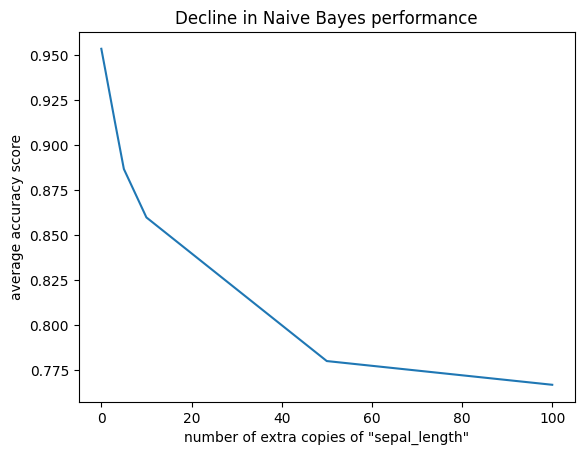

In [27]:
avg_scores = pd.Series(
    [get_cross_val_score(n) for n in n_copies],
    index=n_copies)

ax = avg_scores.plot()
ax.set(
    xlabel='number of extra copies of "sepal_length"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance');

## Question 6 - Naive Bayes on Human Activity Recongnition

In this question, we'll explore discretizing the dataset and then fitting MultinomialNB.  

* Load the Human Activity Recognition dataset.
* Look at the data types. It's all continuous except for the target.
* Create `X` and `y` from `data`. `y` is the "Activity" column.
* Create training and test splits.
* Fit a GaussianNB to the training split.
* Get predictions on the test set.
* use `sns.heatmap` to plot the confusion matrix for predictions.

In [28]:
filepath = "../../data/Human_Activity_Recognition_Using_Smartphones_Data.csv"

data = pd.read_csv(filepath)

In [29]:
print("Human Activity Dataset: Attributes")
for attr in data.columns:
    print(f"\t* {attr}")

Human Activity Dataset: Attributes
	* tBodyAcc-mean()-X
	* tBodyAcc-mean()-Y
	* tBodyAcc-mean()-Z
	* tBodyAcc-std()-X
	* tBodyAcc-std()-Y
	* tBodyAcc-std()-Z
	* tBodyAcc-mad()-X
	* tBodyAcc-mad()-Y
	* tBodyAcc-mad()-Z
	* tBodyAcc-max()-X
	* tBodyAcc-max()-Y
	* tBodyAcc-max()-Z
	* tBodyAcc-min()-X
	* tBodyAcc-min()-Y
	* tBodyAcc-min()-Z
	* tBodyAcc-sma()
	* tBodyAcc-energy()-X
	* tBodyAcc-energy()-Y
	* tBodyAcc-energy()-Z
	* tBodyAcc-iqr()-X
	* tBodyAcc-iqr()-Y
	* tBodyAcc-iqr()-Z
	* tBodyAcc-entropy()-X
	* tBodyAcc-entropy()-Y
	* tBodyAcc-entropy()-Z
	* tBodyAcc-arCoeff()-X,1
	* tBodyAcc-arCoeff()-X,2
	* tBodyAcc-arCoeff()-X,3
	* tBodyAcc-arCoeff()-X,4
	* tBodyAcc-arCoeff()-Y,1
	* tBodyAcc-arCoeff()-Y,2
	* tBodyAcc-arCoeff()-Y,3
	* tBodyAcc-arCoeff()-Y,4
	* tBodyAcc-arCoeff()-Z,1
	* tBodyAcc-arCoeff()-Z,2
	* tBodyAcc-arCoeff()-Z,3
	* tBodyAcc-arCoeff()-Z,4
	* tBodyAcc-correlation()-X,Y
	* tBodyAcc-correlation()-X,Z
	* tBodyAcc-correlation()-Y,Z
	* tGravityAcc-mean()-X
	* tGravityAcc-me

In [30]:
print("Human Activity Dataset: Shape")
print(f"\t* {data.shape[0]} rows")
print(f"\t* {data.shape[1]} columns")

Human Activity Dataset: Shape
	* 10299 rows
	* 562 columns


In [44]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [31]:
X = data.drop(columns=["Activity"])
y = data["Activity"]

In [32]:
print("X, y shape")
print(f"\t* {X.shape}")
print(f"\t* {y.shape}")

X, y shape
	* (10299, 561)
	* (10299,)


In [33]:
from sklearn.model_selection import train_test_split

# import training, testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.3, test_size=0.7, random_state=42, stratify=y
)

print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes: (3089, 561) (7210, 561) (3089,) (7210,)


In [34]:
# fit Gaussian Naive Bayes model

gnb = GaussianNB()
gnb.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [36]:
# get the prediction

predictions = gnb.predict(X_test)

In [37]:
# get the precision, accuracy, recall, f1 for the prediction vs y_test
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

                    precision    recall  f1-score   support

            LAYING       0.99      0.98      0.99      1361
           SITTING       0.56      0.93      0.70      1244
          STANDING       0.86      0.31      0.46      1334
           WALKING       0.91      0.72      0.80      1206
WALKING_DOWNSTAIRS       0.77      0.80      0.78       984
  WALKING_UPSTAIRS       0.70      0.89      0.78      1081

          accuracy                           0.76      7210
         macro avg       0.80      0.77      0.75      7210
      weighted avg       0.81      0.76      0.75      7210



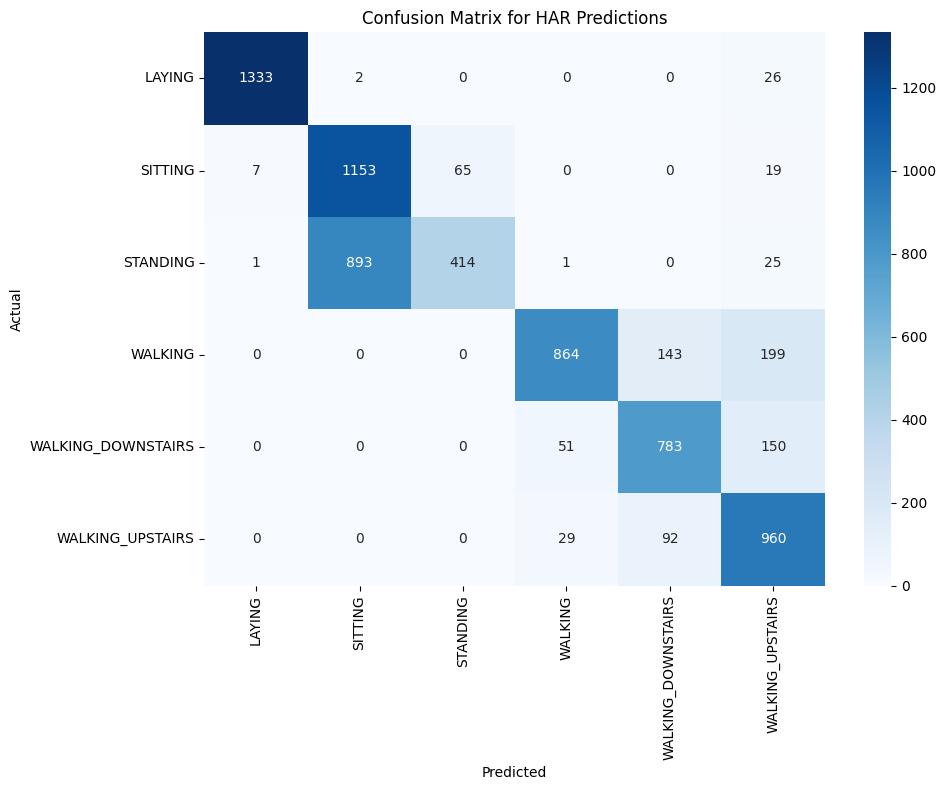

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# plot the hitmap using sns
import matplotlib.pyplot as plt

labels = sorted(y.unique())
cm = confusion_matrix(y_test, predictions, labels=labels)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix for HAR Predictions')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

*Daniel*:  As we can see from the plot we have a good main diagonal, which indicates that our model is performing well in terms of correctly classifying the different activities.

## Question 7

Now, let's discretize the dataset from Question 6. There are many ways to do this, but we'll use `pd.DataFrame.rank(pct=True)`.

a. Create `X_discrete` from `X` using .rank(pct=True)

b. Look at the values. They are still not discrete. Modify `X_discrete` so that it is indeed discrete. (Hint: try to get the first 2 digits using `.applymap`)

c. Split `X_discrete` and `y` into training and test datasets

d. Fit a MultinomialNB to the training split.

e. Get predictions on the test set.

f. Plot the confusion matrix for predictions.

In [60]:
X_discrete = X.copy().rank(pct=True)

In [61]:
X_discrete.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.752209,0.339839,0.162152,0.151762,0.194194,0.462181,0.185164,0.192640,0.450529,0.265948,...,0.186717,0.547238,0.490339,0.259928,0.525002,0.261773,0.491407,0.194776,0.495097,0.348092
1,0.565006,0.556559,0.226333,0.016992,0.262258,0.370619,0.008447,0.266822,0.379454,0.044956,...,0.540247,0.181183,0.208078,0.621614,0.481115,0.173124,0.915234,0.184484,0.496262,0.357608
2,0.618118,0.366929,0.357316,0.146422,0.314011,0.251966,0.112341,0.335275,0.264103,0.182299,...,0.887659,0.430916,0.406447,0.254782,0.674143,0.547723,0.956112,0.169919,0.497330,0.371104
3,0.598505,0.231479,0.228954,0.109816,0.191669,0.086222,0.082629,0.197009,0.112341,0.182299,...,0.878920,0.747160,0.753860,0.372560,0.474027,0.784154,0.195359,0.170599,0.499854,0.377221
4,0.473250,0.545393,0.324012,0.020099,0.218079,0.089426,0.020682,0.228566,0.092436,0.063064,...,0.415283,0.479755,0.507428,0.727935,0.624818,0.802505,0.127391,0.172735,0.510050,0.389358


In [62]:
# get the first two digit
X_discrete.map(lambda x: str(x)[2:][:2])

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,75,33,16,15,19,46,18,19,45,26,...,18,54,49,25,52,26,49,19,49,34
1,56,55,22,01,26,37,00,26,37,04,...,54,18,20,62,48,17,91,18,49,35
2,61,36,35,14,31,25,11,33,26,18,...,88,43,40,25,67,54,95,16,49,37
3,59,23,22,10,19,08,08,19,11,18,...,87,74,75,37,47,78,19,17,49,37
4,47,54,32,02,21,08,02,22,09,06,...,41,47,50,72,62,80,12,17,51,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,84,05,73,71,67,81,70,69,80,84,...,39,45,42,13,77,88,09,62,82,87
10295,94,11,59,70,81,82,68,79,76,84,...,44,51,50,02,20,19,72,61,82,87
10296,92,97,31,67,76,77,66,70,68,76,...,19,74,76,20,58,80,74,61,82,86
10297,15,95,76,68,60,81,66,58,74,76,...,21,65,61,89,03,92,49,61,80,87


In [66]:
X_train_discrete, X_test_discrete = train_test_split(X_discrete, test_size=0.3, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)

In [67]:
# fit a NB Multinomial model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_discrete, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [68]:
predictions = mnb.predict(X_test_discrete)

In [69]:
# compare predictions with true labels
# get accuracy, precision, recall, f1

print(classification_report(y_test, predictions))

                    precision    recall  f1-score   support

            LAYING       0.91      0.86      0.89       597
           SITTING       0.66      0.63      0.64       563
          STANDING       0.71      0.57      0.63       547
           WALKING       0.89      0.93      0.91       539
WALKING_DOWNSTAIRS       0.92      0.89      0.90       420
  WALKING_UPSTAIRS       0.68      0.94      0.79       424

          accuracy                           0.79      3090
         macro avg       0.80      0.80      0.79      3090
      weighted avg       0.80      0.79      0.79      3090



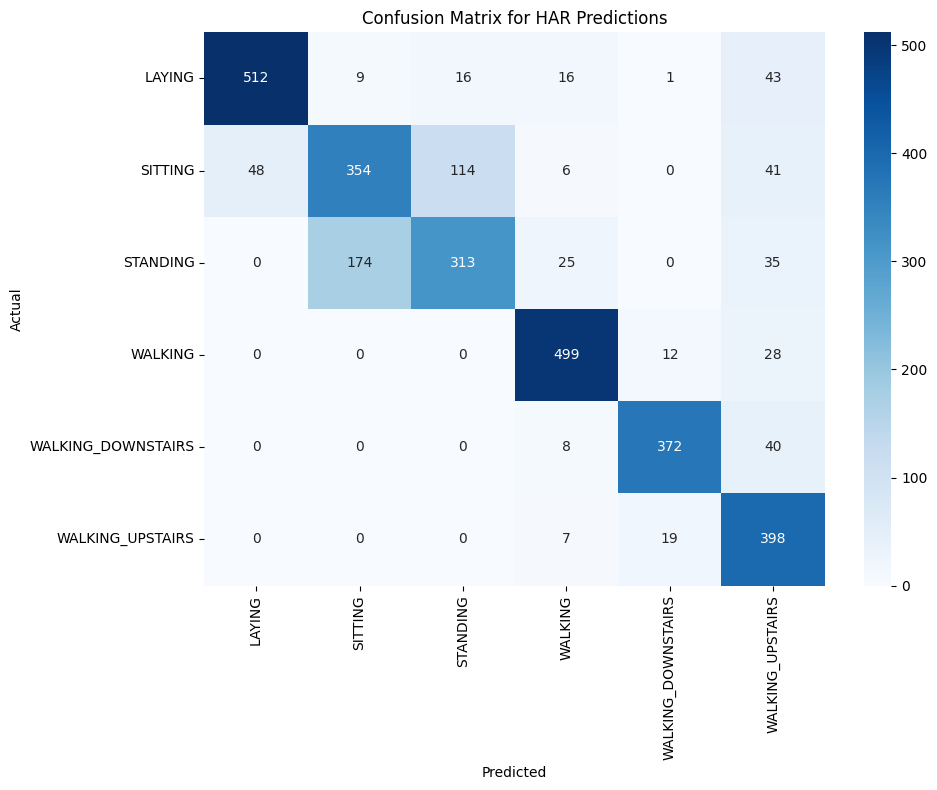

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# plot the hitmap using sns
import matplotlib.pyplot as plt

labels = sorted(y.unique())
cm = confusion_matrix(y_test, predictions, labels=labels)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix for HAR Predictions')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()